In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sign
from decimal import *
import sympy as sp

#Defino precision por defecto 

default_prec= getcontext().prec

# tolerancia , precision e iteraciones por defecto 
tol =10**(-28)
prec=10**(-28)
nmax=1000
default_prec

28

**Ejercicio 1.** Teniendo en cuenta la recomendación explicada sobre los criterios de parada, codifica una función similar a la explicada en el método de bisección para el método de la secante.

Aproxima la raíz de la función $f(x)=e^x-3$:
* Cambiando la precisión a 5 cifras significativas.
* Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

In [2]:
def secante(f, x0, x1, nmax=nmax, prec=prec, tol=tol):

    niter = 0
    cont = True
    exit = ''
    while niter < nmax and cont:
        niter += 1
        xn1 = x1 - (((x1 - x0) / (f(x1) - (f(x0)))) * f(x1))
       

        if abs(f(xn1)) < prec:
            exit = 'precision'
            cont = False
        
        if abs(x1 - xn1) < tol:
            exit = 'tolerancia'
            cont = False
        

    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn1}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn1}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn1, niter, exit


def f(x):
    return np.exp(x) -3

x0=Decimal(1)
x1=Decimal(2)
print("---------------------Precision a 5 cifras---------------------------")
#Pongo la precision a 5 cifras 
getcontext().prec=5
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =secante(f, x0, x1, nmax=1000, prec=1e-28, tol=1e-28)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
print("---------------------Precision por defecto---------------------------")
#Pongo la precision por defecto
getcontext().prec=default_prec
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =secante(f, x0, x1)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")


---------------------Precision a 5 cifras---------------------------
Precision: 5
Se llegó al número máximo de iteraciones 
Raiz : 1.0603
Numero de iteraciones : 1000
---------------------Precision por defecto---------------------------
Precision: 28
Se llegó al número máximo de iteraciones 
Raiz : 1.060315090224325883983432700
Numero de iteraciones : 1000


**Ejercicio 2.** Teniendo en cuenta estos primeros pasos, codifica una función para el método de Wittaker.

Aproxima la raíz de la función $f(x)=e^x-3$:
* Cambiando la precisión a 5 cifras significativas.
* Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

Comprueba que una mala elección de $m$ puede provocar que la sucesión no converja.

In [3]:

def wittaker(f, x0, m, nmax=nmax, prec=prec, tol=tol):

    
    niter = 0
    cont = True
    exit = ''
    while niter < nmax and cont:
        niter += 1
        xn = x0 - (f(x0) / m)
       
        if abs(f(xn)) < prec:
            exit = 'precision'
            cont = False

        if abs(x0 - xn) < tol:
            exit = 'tolerancia'
            cont = False
        x0=xn
    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn, niter, exit
x0=Decimal(1)
m=Decimal(2)
#Pongo la precision a 5 cifras 
print("---------------------Precision a 5 cifras---------------------------")
getcontext().prec=5
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =wittaker(f,x0,m)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
#Pongo la precision por defecto
print("---------------------Precision por defecto---------------------------")
getcontext().prec=default_prec
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =wittaker(f,x0,m)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")


---------------------Precision a 5 cifras---------------------------
Precision: 5
Posiblemente solución exacta: 1.0986
Raiz : 1.0986
Numero de iteraciones : 11
---------------------Precision por defecto---------------------------
Precision: 28
Se llegó al número máximo de iteraciones 
Raiz : 1.098612288668109691395245236
Numero de iteraciones : 1000


Si tomamos un valor de m pequenio la sucesion no convergera correctamente 


In [4]:
#elijo un m pequenio 
m=Decimal(0.5)
getcontext().prec=default_prec
print(f"usando m = {m}")
raiz ,iter ,salida =wittaker(f,x0,m)
print(f"Raiz : {raiz}")
#elijo un m mas pequenio
m=Decimal(0.01)
getcontext().prec=default_prec
print(f"usando m = {m}")
raiz ,iter ,salida =wittaker(f,x0,m)
print(f"Raiz : {raiz}")



usando m = 0.5
Se llegó al número máximo de iteraciones 
Raiz : -80.06828996448858404954353390
usando m = 0.01000000000000000020816681711721685132943093776702880859375
Se llegó al número máximo de iteraciones 
Raiz : -466830493819309.1041063408489


**Ejercicio 3.** Modifique el método anterior para que, en lugar de fijar una pendiente $m$, calcule en cada iteración la derivada de la función en dicho punto, obteniendo el método de Newton-Raphson. Con este método:

Aproxima la raíz de la función $f(x)=e^x-3$:
* Cambiando la precisión a 5 cifras significativas.
* Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

Compare, en iguales condiciones, el rendimiento de Newton-Raphson con respecto al método de Wittaker.

In [5]:
def df(x):
    return np.exp(x)


def NewtonRaphson(f, df, x0, nmax=nmax, prec=prec, tol=tol):

    niter = 0
    cont = True
    exit = ''
    sucesion=[] ## para el ejercicio de aceleracion, necesitamos saber la sucesion 
    while niter < nmax and cont:
        niter += 1
        xn = x0 - (f(x0) / df(x0))
        sucesion.append(xn)
        if abs(x0 - xn) < tol:
            exit = 'tolerancia'
            cont = False
        if abs(f(xn)) < prec:
            exit = 'precision'
            cont = False

        x0 = xn

    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn, niter, exit,sucesion ## devuelvo la sucesion para poder usarla en el ejercicio de aceleracion

x0=Decimal(1)
m=Decimal(2)
#Pongo la precision a 5 cifras 
print("---------------------Precision por a 5 cifras---------------------------")
getcontext().prec=5
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida,sucesion =NewtonRaphson(f,df,x0)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
print("---------------------Precision por defecto---------------------------")
#Pongo la precision por defecto
getcontext().prec=default_prec
print(f"Precision: {getcontext().prec}")
raiz ,iter ,exit ,sucesion =NewtonRaphson(f,df,x0)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")

print("---------------------Calculo wittaker---------------------------")
#elijo un m pequenio 
m=Decimal(2)

print(f"usando m = {m}")
raizwit ,iterw ,salida =wittaker(f,x0,m)
print(f"Raiz : {raizwit}")
print("---------------------Comparacion wittaker y NR---------------------------")
print(f"comparamos : ")
print(f"wittaker = {raizwit}  ,iteraciones = {iterw} " )
print(f"NewtonRaphson= {raiz} , iteraciones = {iter}" )
print(f"Raiz de la funcion = ln(3) ={np.log(3)}")



   

---------------------Precision por a 5 cifras---------------------------
Precision: 5
Posiblemente solución exacta: 1.0986
Raiz : 1.0986
Numero de iteraciones : 2
---------------------Precision por defecto---------------------------
Precision: 28
Posiblemente solución exacta: 1.098612288668109691395245237
Raiz : 1.098612288668109691395245237
Numero de iteraciones : 5
---------------------Calculo wittaker---------------------------
usando m = 2
Se llegó al número máximo de iteraciones 
Raiz : 1.098612288668109691395245236
---------------------Comparacion wittaker y NR---------------------------
comparamos : 
wittaker = 1.098612288668109691395245236  ,iteraciones = 1000 
NewtonRaphson= 1.098612288668109691395245237 , iteraciones = 5
Raiz de la funcion = ln(3) =1.0986122886681098


Vemos que la diferencia  de la aproximacion es minima , en todo caso habria que tener cuidado con el metodo de wittaker ya que hay que prestar atencion a la eleccion de m ya que si escogemos mal el valor puede no aproximar tan bien la raiz , por lo contrario con NR no nos tenemos que preocupar de escoger este valor . 

Podemos observar tambien que wittaker hace muchas mas iteraciones que NR y que el metodo de witaker en este caso para por tolerancia mientras que NR para por precision .

**Ejercicio 4.** Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

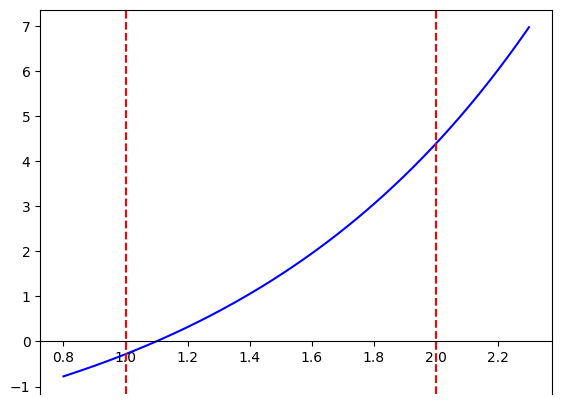

In [6]:
def f1(x):
    return x**3 +4*(x**2) -10
def df1(x):
    return 3*(x**2) +4*(x**2) -10

def biseccion(f, a, b, nmax=nmax, prec=prec, tol=tol):

    niter = 0
    cont = True
    exit = ''
    while niter < nmax and cont:
        niter += 1
        c = (a + b) / 2
        if abs(f(c)) < prec:
            exit = 'precision'
            cont = False
        elif sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c

        if abs(b - a) < tol:
            exit = 'tolerancia'
            cont = False

    if exit == 'precision':
        print(f'Posiblemente solución exacta: {c}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {c}')
    else:
        print('Se llegó al número máximo de iteraciones')
    return c, niter, exit

x = np.linspace(0.8, 2.3, 150) ## genero puntos para la funcion , los tomo con un margen para poder verlo bien el grafico 
y = f(x)  

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.spines['bottom'].set_position('zero')
ax.plot(x, y, 'b')

ax.axvline(x=1, color='r', linestyle='--')
ax.axvline(x=2, color='r', linestyle='--')
plt.show()



 Vemos que en el intervalo [1,2] marcado por las lineas rojas la funcion corta una sola vez a la recta x=0 por tanto solo tiene una raiz en ese intervalo
 De forma teorica podriamos ver que f(1)*f(2)<0 y f es continua por tanto por el teorema  de bolzano hay una raiz en [1,2] y como es f estrictamente creciente seria unica
 Por tanto podemos confiar en la grafica y ver que hay una unica raiz en este intervalo 

In [7]:
##ejecuto con los parametros pedidios en el ejercicio 
x0=Decimal(1)
x1=Decimal(2)
#Pongo la precision por defecto
print("--------------------- 3 cifras decimales exactas biseccion---------------------------")
getcontext().prec=default_prec
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =biseccion(f,x0,x1,nmax=1000, prec=1e-25, tol=1e-3)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
print("--------------------- 5 cifras decimales exactas biseccion (iteraciones)---------------------------")
raiz ,iter ,salida =biseccion(f,x0,x1,nmax=1000, prec=1e-25, tol=1e-5)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones para 5 cifras exactas : {iter}")
print("--------------------- 3 cifras decimales exactas NR---------------------------")
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida,sucesion =NewtonRaphson(f,df,x0,nmax=1000, prec=1e-25, tol=1e-3) ##en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")

--------------------- 3 cifras decimales exactas biseccion---------------------------
Precision: 28
Aproximación solicitada: 1.0986328125
Raiz : 1.0986328125
Numero de iteraciones : 10
--------------------- 5 cifras decimales exactas biseccion (iteraciones)---------------------------
Aproximación solicitada: 1.09860992431640625
Raiz : 1.09860992431640625
Numero de iteraciones para 5 cifras exactas : 17
--------------------- 3 cifras decimales exactas NR---------------------------
Precision: 28
Aproximación solicitada: 1.098612288747607579574966041
Raiz : 1.098612288747607579574966041
Numero de iteraciones : 3



**Ejercicio 5.** Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

1. $3x=2+x^2-e^x$.

2. $x^2+10 \cos x+x=0$.

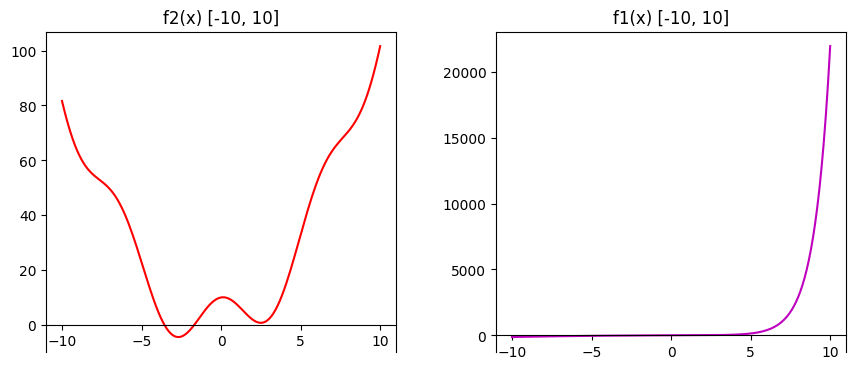

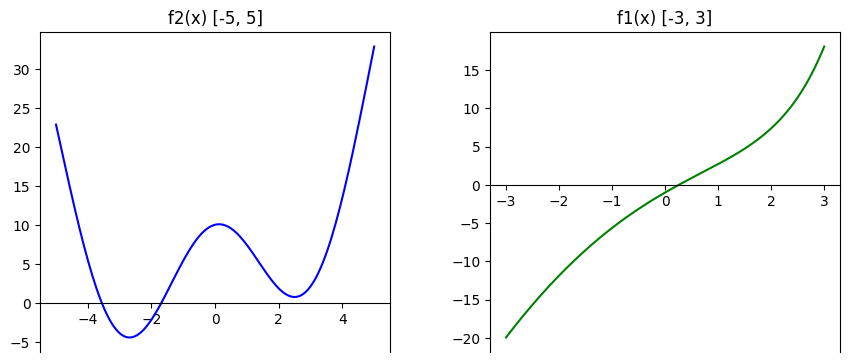

In [8]:
def f1(x):
   return (3*x) -2 -(x**2) +np.exp(x)
def f2(x):
   return x**2 + 10*np.cos(x) +x
def df1(x):
   return 3 -2*x +np.exp(x)
def df2(x):
   return 2*x -10*np.sin(x) +1
x2 = np.linspace(-5, 5, 150)
y2 = f2(x2)  
x1 = np.linspace(-3, 3, 150)
y1 = f1(x1)  
x2_2 = np.linspace(-10, 10, 150)
y2_2 = f2(x2_2)  
x1_2 = np.linspace(-10, 10, 150)
y1_2 = f1(x1_2)  
# Figura 2: valores de 100 a -100
fig2 = plt.figure(figsize=(10, 4))

# Gráfico f2 con x de 100 a -100
ax4 = fig2.add_axes([0.1, 0.1, 0.35, 0.8])
ax4.spines['bottom'].set_position('zero')
ax4.plot(x2_2, y2_2, 'r')
ax4.set_title('f2(x) [-10, 10]')

# Gráfico f1 con x de 100 a -100
ax3 = fig2.add_axes([0.55, 0.1, 0.35, 0.8])
ax3.spines['bottom'].set_position('zero')
ax3.plot(x1_2, y1_2, 'm')
ax3.set_title('f1(x) [-10, 10]')

plt.show()
fig = plt.figure(figsize=(10, 4))

# Grafico f2
ax2 = fig.add_axes([0.1, 0.1, 0.35, 0.8])
ax2.spines['bottom'].set_position('zero')
ax2.plot(x2, y2, 'b')
ax2.set_title('f2(x) [-5, 5]')

# Grafico f1
ax1 = fig.add_axes([0.55, 0.1, 0.35, 0.8])
ax1.spines['bottom'].set_position('zero')
ax1.plot(x1, y1, 'g')
ax1.set_title('f1(x) [-3, 3]')

plt.show()



He graficado las funciones para saber donde se ubican sus raices . En la primera grafica podemos ver una vision general del comportamiento de ambas funciones , y en la segunda grafica me acerco mas a donde se encuentran las raices para poder acotar bien el intervalo en el que se encuentran.

Usando la teoria en la funcion f1 podemos ver que tiene una unica raiz cerca del 0  , al ser una funcion estrictamente creciente y continua y con  f(-2)*f(2)<0 sabemos que tiene una unica(teorema de Bolzano) raiz cerca del 0
En la  funcion f2 vemos que para x<-4 la funcion es decreciente y positiva , y a partir de x=-1 es siempre positiva . por tanto las raices se encuentran en el intervalo [-4,-1] , vemos que tiene dos raices en este intervalo , si tomamos los subintervalos [-4,-3.5] y [-2.5,-1] y aplicamos el mismo criterio que para f1 ya que se cumple en esos intervalos las hipotesis previamente nombradas , sabemos que en cada intervalo hay una unica raiz por ser f2 continua y f(a)*f(b)<0 para cada intervalo y estrictamente decreciente en el primero y continua y estrictamente creciente y continua  en el otro.

**Ejercicio 6.** Para la función  $ f(x)= 3 x^2+e^x-1$,

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.  

In [9]:

def f3(x):
    return 3*(x**2) + np.exp(x)-1
def df3(x):
    return 6*x + np.exp(x)


x0=Decimal(0)
x1=Decimal(1)
print("--------------------- 4 cifras decimales exactas biseccion---------------------------")
getcontext().prec=default_prec
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =biseccion(f3,x0,x1,tol=1e-4)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
print("---------------------  4 cifras decimales exactas NR---------------------------")
raiz ,iter ,salida,sucesion =NewtonRaphson(f3,df3,x0,1e-4) 
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")


--------------------- 4 cifras decimales exactas biseccion---------------------------
Precision: 28
Aproximación solicitada: 0.00006103515625
Raiz : 0.00006103515625
Numero de iteraciones : 14
---------------------  4 cifras decimales exactas NR---------------------------
Posiblemente solución exacta: 0
Raiz : 0
Numero de iteraciones : 1


> **Ejercicio 7.** Implemente el método de iteración funcional de Steffensen para una función $f$. En particular, para la función $f(x)=e^x-3$:
> * Represente gráficamente las funciones $g$ definidas tanto para el método de Newton-Raphson como para el método de Steffensen, comprobando que ambas poseen un punto fijo en la raíz de $f$.
> * Aproxima su única raíz utilizando el método de Steffensen:
>     * Cambiando la precisión a 5 cifras significativas.
>     * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

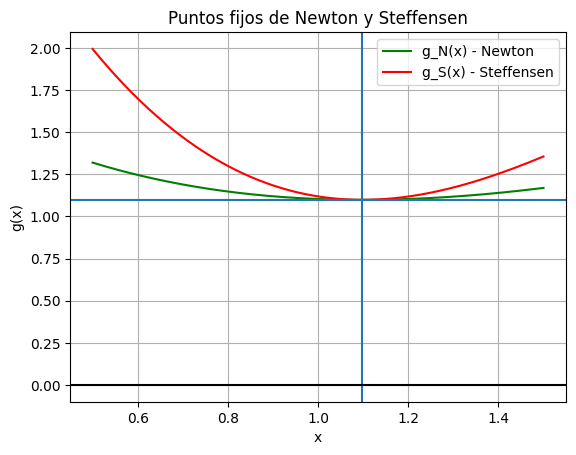

Punto fijo Newton : 1.0986122886681096 = ln(3) = 1.0986122886681098
Punto fijo Steffensen : 1.0986122886681096 = ln(3) = 1.0986122886681098


In [10]:

def Steffensen(f,x0, nmax=nmax, prec=prec, tol=tol):

    niter = 0
    cont = True
    exit = ''

    while niter < nmax and cont:
        niter += 1
        xn = x0 - ((f(x0)**2) / (f(x0+f(x0))-f(x0)))

        if abs(f(xn)) < prec:
            exit = 'precision'
            cont = False

        if abs(x0 - xn) < tol:
            exit = 'tolerancia'
            cont = False
        x0=xn
    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn, niter, exit

g_newton = lambda x: x - f(x)/df(x)
g_steff = lambda x: x - (f(x)**2)/(f(x + f(x)) - f(x))

x_vals = np.linspace(0.5, 1.5, 400)
y_identity = x_vals
y_newton = g_newton(x_vals)
y_steff = g_steff(x_vals)


plt.plot(x_vals, y_newton, 'g', label='g_N(x) - Newton')
plt.plot(x_vals, y_steff, 'r', label='g_S(x) - Steffensen')
plt.legend()
plt.grid(True)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.axvline(np.log(3), linestyle='-', label='x = ln(3)')
plt.axhline(np.log(3), linestyle='-')
plt.axhline(0,color="black", linestyle='-')
plt.title("Puntos fijos de Newton y Steffensen")
plt.show()

## para comprobar que son un punto fijo veamos que g(x)=x con x=ln(3) que es la raiz de f= e^x -3 , a parte vemos que en la grafica cortan a la recta y=ln(3)

print(f"Punto fijo Newton : {g_newton(np.log(3))} = ln(3) = {np.log(3)}")
print(f"Punto fijo Steffensen : {g_steff(np.log(3))} = ln(3) = {np.log(3)}")

In [11]:
def f(x):
    return np.exp(x) -3
## aproximacion de la raiz usando steffensen 
x0=Decimal(1)
print("--------------------- Precision de 5 cifras---------------------------")
raiz,iter,salida = Steffensen(f,x0)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
print("--------------------- Precision por defecto---------------------------")
raiz,iter,salida = Steffensen(f,x0)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")

--------------------- Precision de 5 cifras---------------------------
Posiblemente solución exacta: 1.098612288668109691395245237
Raiz : 1.098612288668109691395245237
Numero de iteraciones : 6
--------------------- Precision por defecto---------------------------
Posiblemente solución exacta: 1.098612288668109691395245237
Raiz : 1.098612288668109691395245237
Numero de iteraciones : 6


> **Ejercicio 8.** Implemente el método de aceleración de la convergencia de Steffensen y aplíquelo a una sucesión de valores obtenidos mediante iteración funcional de Newton-Raphson a la función $f(x) = e^x -3$. Compare las aproximaciones tras 4 iteraciones del método de Newton-Raphson, aceleración de la convergencia de Aitken y aceleración de la convergencia de Steffensen.

In [23]:

def Aitken(sucesion,prec=prec,tol=tol):
    sucesionatiken =[]

    for k in range(len(sucesion)-2):
        xk, xk1, xk2 = sucesion[k], sucesion[k+1], sucesion[k+2]
        hat_xk = xk - (xk1-xk)**2 / (xk2-2*xk1+xk)
        sucesionatiken.append(hat_xk)
    return sucesionatiken,k ,exit

def accStefenssenNR(x0,f,df,nmax=nmax,prec=prec,tol=tol):
    niter = 0
    cont = True
    exit = ''
    sucesion =[]
    g = lambda x: x - f(x)/df(x)
    x1=g(x0)
    x2=g(x1)
    while niter<nmax and cont:
        niter+=1
        x_0 =x0-((x1-x0)**2)/(x2-2*x1+x0)
        sucesion.append(x_0)

        if abs(x0-x_0)<tol:
            cont = False
            exit='tolerancia'
        if abs(f(x_0))<prec:
            cont =False
            exit = 'precision'
        x0=x_0
        x1=g(x0)
        x2=g(x1)
        

    if exit == 'precision':
        print(f'Posiblemente solución exacta:{sucesion[-1]}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {sucesion[-1]}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return sucesion, niter, exit
def f(x):
    return np.exp(x) -3
def df(x):
    return np.exp(x)
x0=Decimal(1)
getcontext().prec=default_prec
print("---------------------accSteffensenNR---------------------------")
sucesion,iter,exit = accStefenssenNR(x0,f,df)
print(f"Sucesion : {sucesion}")
print(f"Raiz : {sucesion[-1]}")
print(f"Numero de iteraciones : {iter}")
print("--------------------- NR---------------------------")
raiz,iter,exit,sucesion = NewtonRaphson(f,df,x0)
print(f"Raiz : {raiz}")
print(f"Sucesion : {sucesion}")
print(f"Numero de iteraciones : {iter}")
print("--------------------- Aittken---------------------------")
sucesionat,iter,exit = Aitken(sucesion)
print(f"Raiz : {sucesionat[-1]}")
print(f"Sucesion : {sucesionat}")
print(f"Numero de iteraciones : {iter}")




---------------------accSteffensenNR---------------------------
Posiblemente solución exacta:1.098612288668109691395245237
Sucesion : [Decimal('1.098856228284993273911403282'), Decimal('1.098612288664480838473810629'), Decimal('1.098612288668109691395245237')]
Raiz : 1.098612288668109691395245237
Numero de iteraciones : 3
--------------------- NR---------------------------
Posiblemente solución exacta: 1.098612288668109691395245237
Raiz : 1.098612288668109691395245237
Sucesion : [Decimal('1.103638323514326964786571311'), Decimal('1.098624898047342607291364445'), Decimal('1.098612288747607579574966041'), Decimal('1.098612288668109691398405194'), Decimal('1.098612288668109691395245237')]
Numero de iteraciones : 5
--------------------- Aittken---------------------------
Raiz : 1.098612288668109691395245237
Sucesion : [Decimal('1.098612256953909413056675939'), Decimal('1.098612288668109190184681770'), Decimal('1.098612288668109691395245237')]
Numero de iteraciones : 2


Podemos ver que la que mas rapido converge es la sucesion 


> **Ejercicio 9** Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):
> 
> i) $f(x)=x^7-x^4+2$ ,
> 
> ii) $f(x)=x^7+\cos  x-3$.

--------------------- soluciones primera ecuacion (usando sympy)---------------------------
[-1.00000000000000, -0.713102145851293 - 0.98823188827156*I, -0.713102145851293 + 0.98823188827156*I, 1.06110281046036 - 0.376384046559108*I, 1.06110281046036 + 0.376384046559108*I, 0.151999335390936 - 1.01945594669063*I, 0.151999335390936 + 1.01945594669063*I]


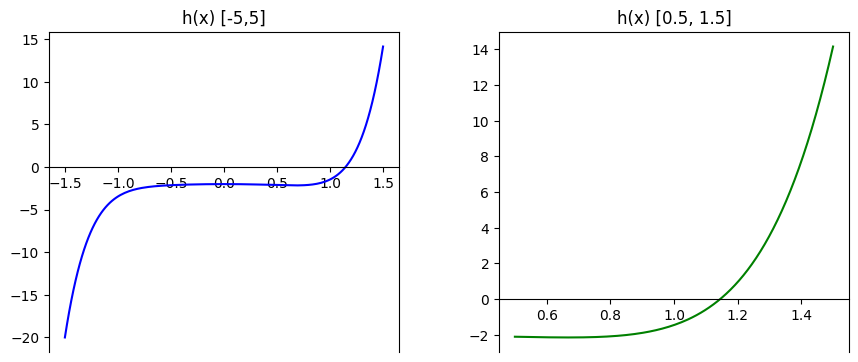

--------------------- Segunda ecuacion (usando fsolve)---------------------------
Raiz : 1.1454598072700086


In [13]:
from scipy.optimize import fsolve

##uso sympy para resolver 
#primera ecuacion
x=sp.Symbol('x')
soluciones1=sp.solve(x**7 -x**4 +2) ## da las soluciones en forma de raices 
soluciones1_numericas = [s.evalf() for s in soluciones1] ## paso las soluciones a valores numericos 
print("--------------------- soluciones primera ecuacion (usando sympy)---------------------------")
print(soluciones1_numericas)

#uso fsolve ya que no puedo usar sympy con cos , como para fsolve necesitamos un valor inicial grafico la funcion para ver donde esta   su raiz

def f(x):
    return np.cos(x)+ x**7 -3


x0 = np.linspace(-1.5,1.5, 150)
y0 = f(x0)  
x1=np.linspace(0.5, 1.5, 150)
y1=f(x1)

fig = plt.figure(figsize=(10, 4))
ax2 = fig.add_axes([0.1, 0.1, 0.35, 0.8])
ax2.spines['bottom'].set_position('zero')
ax2.plot(x0, y0, 'b')
ax2.set_title('h(x) [-5,5]')

# Grafico f1
ax1 = fig.add_axes([0.55, 0.1, 0.35, 0.8])
ax1.spines['bottom'].set_position('zero')
ax1.plot(x1, y1, 'g')
ax1.set_title('h(x) [0.5, 1.5]')
plt.show()

#viendo donde esta la raiz en la grafica ya sabemos que x0 tomar y podemos usar fsolve
x0=1.2
solucion = fsolve(f,x0)
print("--------------------- Segunda ecuacion (usando fsolve)---------------------------")
print(f"Raiz : {solucion[0]}")



> **Ejercicio 10:** De los métodos implementados en los anteriores ejercicios, utiliza el método o métodos numéricos que desees para aproximar la primera raíz de la función
> $$
> f:[0,1]\longrightarrow\mathbb R \\
> f(x) = x(1-x)\sin\left(\dfrac{2\pi}{x+1/10}\right)
> $$
> que sea mayor que una milésima con una precisión de 28 cifras significativas y utilizando el menor número de iteraciones posible. Imprime por pantalla tu aproximación y el número de iteraciones utilizado.

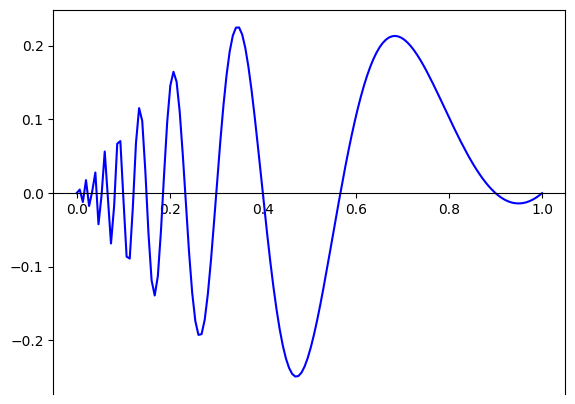

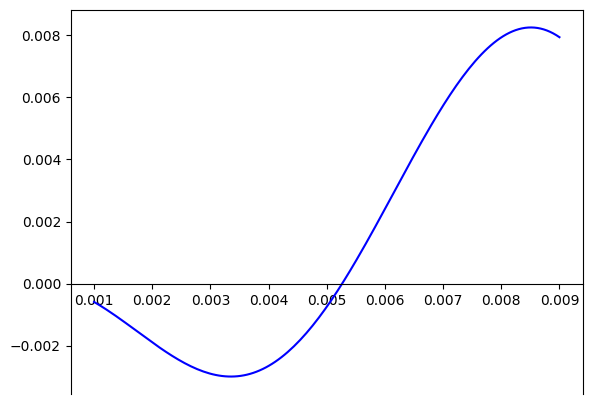

--------------------- biseccion---------------------------
Posiblemente solución exacta: 0.005263157894736842105263157911
Raiz : 0.005263157894736842105263157911
Numero de iteraciones : 83
---------------------Secante---------------------------
Se llegó al número máximo de iteraciones 
Raiz : 0.005235712914181676398386729097
Numero de iteraciones : 1000
--------------------- NR---------------------------
Posiblemente solución exacta: 0.005263157894736842105263157896
Raiz : 0.005263157894736842105263157896
Numero de iteraciones : 5


In [14]:
from mpmath import mp, mpf, sin, cos, pi ## para tener mas precision con cos y sin

mp.dps = 28 ## para usar 28 cifras significativs
def f4(x):
    x = mpf(x)
    return x * (1 - x) * sin(2 * pi / (x + mpf('0.1')))

def df4(x):
    x = mpf(x)
    
    term1 = (1 - 2 * x) * sin(2 * pi / (x + mpf('0.1')))
    term2 = x * (1 - x) * cos(2 * pi / (x + mpf('0.1'))) * (-2 * pi) / ((x + mpf('0.1')) ** 2)
    return term1 + term2

x = np.linspace(0, 1, 150)
y = [float(f4(xi)) for xi in x]  

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.spines['bottom'].set_position('zero')
ax.plot(x, y, 'b')
plt.show()

## Como la raiz tiene que ser mayor que una milesima voy a graficar la funcion cerca del punto que nos interesa que es el 0,001
x = np.linspace(0.001, 0.009, 150)
y = [float(f4(xi)) for xi in x]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.spines['bottom'].set_position('zero')
ax.plot(x, y, 'b')
plt.show()

#Vemos que la primera raiz mayor que 0,001 esta en el intervalo [0,005 , 0,006] por tanto
# aplicaremos el metodo de newtoraphson en un punto de ese intervalo
x0=mpf(0.005)
x1=mpf(0.006)
print("--------------------- biseccion---------------------------")
raiz,iter,exit = biseccion(f4,mpf(0.005),mpf(0.006))
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
print("---------------------Secante---------------------------")
raiz,iter,exit = secante(f4,x0,x1)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
print("--------------------- NR---------------------------")
raiz,iter,exit,sucesion = NewtonRaphson(f4,df4,x0)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")


Como se puede observar el metodo de NR es el que menos iteraciones necesita , pero por contra tenemos que calcular la derivada de la funcion que en este caso no es tan simple como la de otras funciones . Si podemos calcular la derivada el metodo de NR seria el que elegiriamos por su eficiencia ya que solo hace 4 iteraciones y su aproximacion es muy exacta . 
Si no tenemos posibilidad de usar la derivada podemos ver que el metodo de biseccion usa 44 iteraciones hasta conseguir una buena solucion . 